In [1]:
%set_env GOOGLE_APPLICATION_CREDENTIALS=google-credentials.json

env: GOOGLE_APPLICATION_CREDENTIALS=google-credentials.json


In [2]:
import DB_Control
from StockMarket.market import StockMarket

db = DB_Control.initialise_database()
stonks = StockMarket(db)

Inicializando módulo Firestore...
Credenciales validadas, inicializando cliente...
Cliente inicializado satisfactoriamente, conexión a Firebase exitosa!
	Inicializando submódulo StockMarket.market
	Módulo cargado con éxito


In [3]:
from datetime import datetime
# Generar una hora de datos aleatorios
for sym, doc in stonks.stock_refs.items():
    for i in range(100):
        current, new, change, free = stonks.calculate_price_change(sym)
        stonks.price_to_history(sym, current, change, free)
        stonks.set_stock_price(sym, new)
        print(f"Price for {sym}: {round(current, 2)} -> {round(new, 2)} ({round(change*100, 2)}% change)")
    
    history, tot_change = stonks.get_price_history(sym, 100)
    print(f"En este tiempo, {sym} cambió en {round(tot_change*100, 2)}%\n")
        

 3.5 -> 3.49 (-0.32% change)
Price for XIACF: 3.49 -> 3.48 (-0.27% change)
Price for XIACF: 3.48 -> 3.52 (1.26% change)
Price for XIACF: 3.52 -> 3.53 (0.28% change)
Price for XIACF: 3.53 -> 3.54 (0.25% change)
Price for XIACF: 3.54 -> 3.54 (0.13% change)
Price for XIACF: 3.54 -> 3.58 (0.9% change)
Price for XIACF: 3.58 -> 3.58 (0.08% change)
Price for XIACF: 3.58 -> 3.57 (-0.19% change)
Price for XIACF: 3.57 -> 3.57 (-0.1% change)
Price for XIACF: 3.57 -> 3.56 (-0.21% change)
Price for XIACF: 3.56 -> 3.61 (1.26% change)
Price for XIACF: 3.61 -> 3.61 (0.1% change)
Price for XIACF: 3.61 -> 3.61 (-0.08% change)
Price for XIACF: 3.61 -> 3.6 (-0.17% change)
Price for XIACF: 3.6 -> 3.52 (-2.15% change)
Price for XIACF: 3.52 -> 3.53 (0.1% change)
Price for XIACF: 3.53 -> 3.52 (-0.18% change)
Price for XIACF: 3.52 -> 3.52 (0.16% change)
Price for XIACF: 3.52 -> 3.53 (0.16% change)
Price for XIACF: 3.53 -> 3.52 (-0.2% change)
Price for XIACF: 3.52 -> 3.52 (-0.12% change)
Price for XIACF: 3.52 -

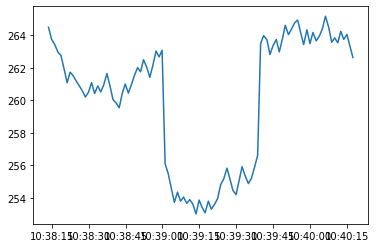

In [4]:
import matplotlib.pyplot as plt

history, change = stonks.get_price_history("FB", 100)

prices = [doc.to_dict()["price"] for doc in history]
dates = [doc.to_dict()["timestamp"] for doc in history]

plt.plot(dates, prices)